<a href="https://colab.research.google.com/github/Arvinth-s/Dark-Sight/blob/master/DarkSight_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#OM NAMO NARAYANA

In [2]:
from google.colab import drive
import numpy as np
import os
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_dir = '/content/drive/My Drive/Dataset/Dataset/'
os.chdir(dataset_dir)

In [4]:
subdirs=[]
for path, sd, files in os.walk(dataset_dir):
    if(sd != []):
      subdirs.append(sd)
subdirs=subdirs[0]
A=[]
for subdir in subdirs:
  a = list(os.listdir(subdir))
  a.sort()
  if(len(a)==10):
    a.append(subdir)
    A.append(a)
A = np.array(A)
longExposure=[]
shortExposure=[]
temperature=[]
longExposure = [dataset_dir + a[10] + "/" + a[4] for a in A]
shortExposure =[dataset_dir + a[10] + "/" +a[5] for a in A]
temperature = [dataset_dir + a[10] + "/" +a[6] for a in A]
print(shortExposure)

['/content/drive/My Drive/Dataset/Dataset/2020-02-25 00-58-10Cannon200DShots/2020-02-25 00-58-40small_shortCannon200DShots.JPG', '/content/drive/My Drive/Dataset/Dataset/2020-02-25 01-04-24Cannon200DShots/2020-02-25 01-04-26small_shortCannon200DShots.JPG', '/content/drive/My Drive/Dataset/Dataset/2020-02-25 01-06-00Cannon200DShots/2020-02-25 01-06-03small_shortCannon200DShots.JPG', '/content/drive/My Drive/Dataset/Dataset/2020-02-25 01-01-03Cannon200DShots/2020-02-25 01-01-07small_shortCannon200DShots.JPG', '/content/drive/My Drive/Dataset/Dataset/2020-02-25 00-59-54Cannon200DShots/2020-02-25 01-00-00small_shortCannon200DShots.JPG', '/content/drive/My Drive/Dataset/Dataset/2020-02-25 01-03-05Cannon200DShots/2020-02-25 01-03-07small_shortCannon200DShots.JPG', '/content/drive/My Drive/Dataset/Dataset/2020-02-25 00-50-20Cannon200DShots/2020-02-25 00-50-26small_shortCannon200DShots.JPG', '/content/drive/My Drive/Dataset/Dataset/2020-02-25 00-54-41Cannon200DShots/2020-02-25 00-54-43small_sh

In [ ]:
# imports
import torch
import torchvision.transforms as transforms
import glob
import matplotlib.pyplot as plt
import torchvision
import time
import albumentations as A
 
from torch.utils.data import DataLoader, Dataset
from PIL import Image

[__call__](https://www.geeksforgeeks.org/__call__-in-python/)

[special function
](https://discuss.pytorch.org/t/using-a-special-function-as-a-transform/42760)

In [63]:
class myTransforms():
  class Resize():
    def __init__(self, size, interpolation=Image.BILINEAR):
      self.size=size
      self.interpolation=interpolation
    def __call__(self, img):
      old_size = img.size

      ratio = float(self.size)/max(old_size)
      new_size = tuple([int(x * ratio) for x in old_size])

      return (img.resize(new_size, resample=self.interpolation))
      

In [64]:
def show_img(img):
    plt.figure(figsize=(18,15))
    # unnormalize
    img = img / 2 + 0.5  
    npimg = img.numpy()
    npimg = np.clip(npimg, 0., 1.)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [65]:
#custom function in transform
class Resize(object):
    def __init__(self, size, interpolation=Image.BILINEAR):
        self.size = size
        self.interpolation = interpolation

    def __call__(self, img):
        old_size = img.size  # old_size[0] is in (width, height) format

        ratio = float(self.size)/max(old_size)
        new_size = tuple([int(x * ratio) for x in old_size])

        return (img.resize(new_size, resample=self.interpolation))

In [35]:
# define pytorch transforms
transforms1 = transforms.Compose([
     transforms.ToPILImage(),
     transforms.Resize((300, 300)),
     transforms.CenterCrop((280, 280)),
     transforms.RandomCrop((80, 80)),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.RandomRotation(degrees=(-20, 20)),
     transforms.ToTensor(),
     #mean and std=0.5
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     ])

In [66]:
# define pytorch transforms
transforms2 = transforms.Compose([
     transforms.ToPILImage(),
     myTransforms.Resize((100),
    transforms.CenterCrop((280, 280)),
    #  transforms.RandomCrop((80, 80)),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.RandomRotation(degrees=(-20, 20)),
     transforms.ToTensor(),
     #mean and std=0.5
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     ])

SyntaxError: ignored

In [9]:
# PyTorch image augmentation module
image_list=longExposure
class PyTorchImageDataset(Dataset):
    def __init__(self, image_list, transforms=None):
        self.image_list = image_list
        self.transforms = transforms
         
    def __len__(self):
        return (len(self.image_list))
    
    def __getitem__(self, i):
        image = plt.imread(self.image_list[i])
        image = Image.fromarray(image).convert('RGB')        
        image = np.asarray(image).astype(np.uint8)
        if self.transforms is not None:
            image = self.transforms(image)
            
        return torch.tensor(image, dtype=torch.float)

In [47]:
pytorch_dataset = PyTorchImageDataset(image_list=image_list, transforms=transforms1)
pytorch_dataloader1 = DataLoader(dataset=pytorch_dataset, batch_size=16, shuffle=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


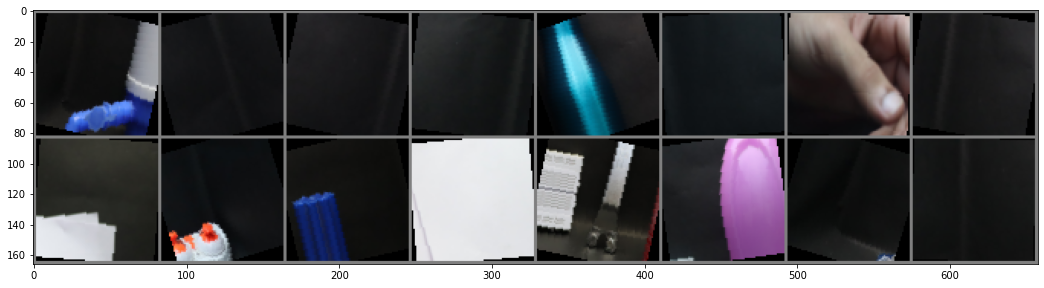

In [36]:
data = iter(pytorch_dataloader1)
images1 = data.next()

# show images
show_img(torchvision.utils.make_grid(images1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


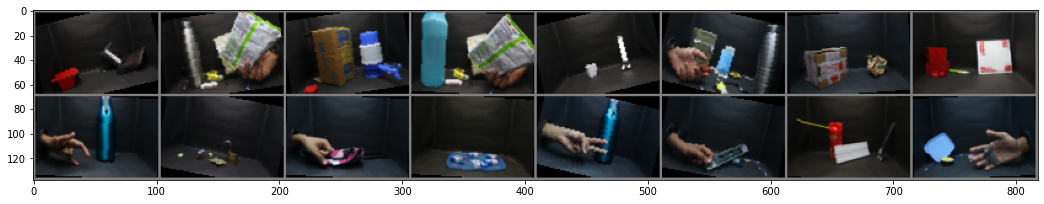

In [67]:
pytorch_dataset = PyTorchImageDataset(image_list=image_list, transforms=transforms2)
pytorch_dataloader2 = DataLoader(dataset=pytorch_dataset, batch_size=16, shuffle=True)
data = iter(pytorch_dataloader2)
images2 = data.next()
show_img(torchvision.utils.make_grid(images2))